$C(x, y) = c_g (x, y)+U_{REF}(x, y)-2\alpha(x,y) A_0(x,y)$

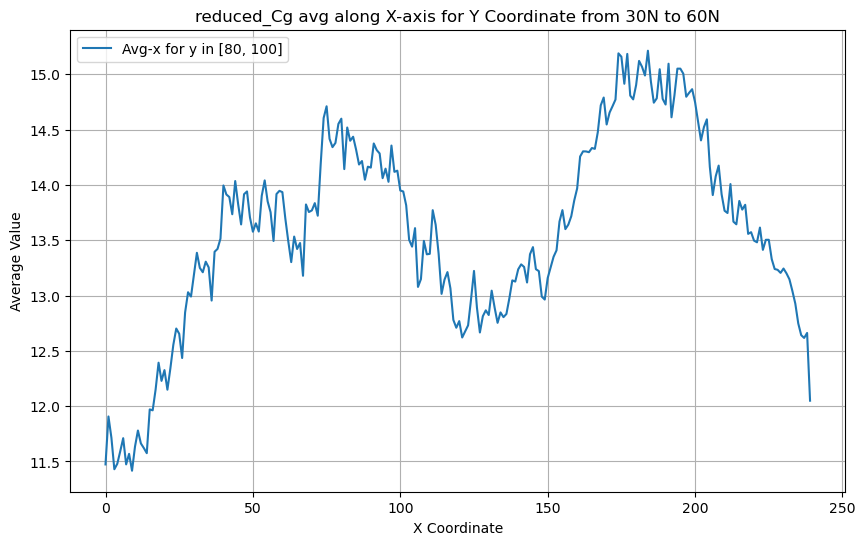

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

global reduced_Cg_avg_1D

# Path to the saved .npy file
output_directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(output_directory, "reduced_Cg_avg_1D.npy")
reduced_Cg_avg_1D = np.load(file_path)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reduced_Cg_avg_1D, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('reduced_Cg avg along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


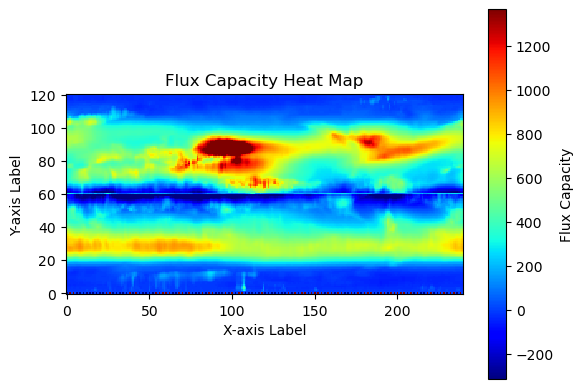

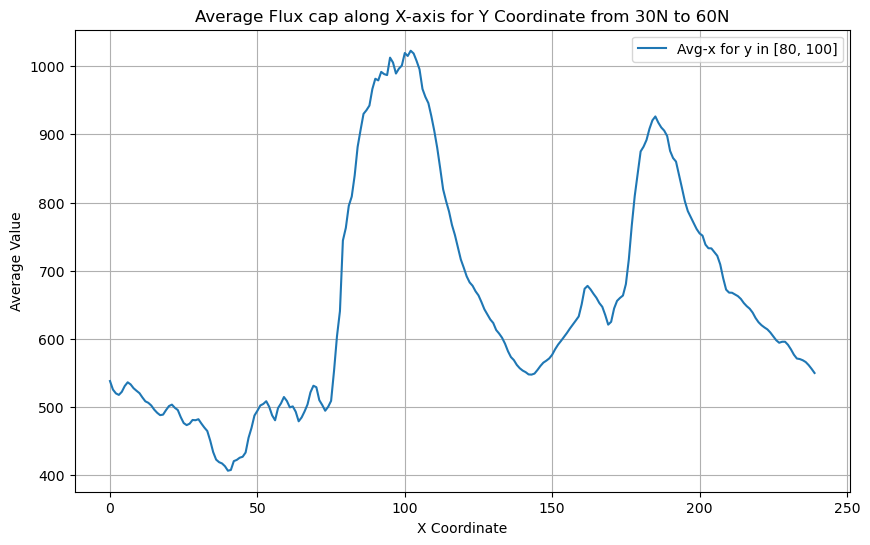

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = "/scratch/negishi/yan481/KenYan_Traffic_Model/Flux_Capacity_DJF.npy"
capacity = np.load(file_path)

# Determine the min and max values for the capacity data
vmin_val = np.nanpercentile(capacity, 1)
vmax_val = np.nanpercentile(capacity, 99)


# Clip the capacity values to lie within the determined min and max
flux_capacity_2d = np.clip(capacity, vmin_val, vmax_val)

# Plot the 2D heat map
plt.imshow(flux_capacity_2d, cmap='jet', origin = 'lower', interpolation='nearest')
plt.colorbar(label='Flux Capacity')
plt.title('Flux Capacity Heat Map')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


y_range_data = flux_capacity_2d[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_flux_cap = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_flux_cap, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average Flux cap along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
zonal_avg_Cg = None
zonal_avg_u0 = None
zonal_avg_b = None
zonal_avg_a0 = None
zonal_avg_product = None
zonal_avg_Uref = None

Shape of A0: (121, 240)
Indices of nan values in A0: (array([], dtype=int64), array([], dtype=int64))


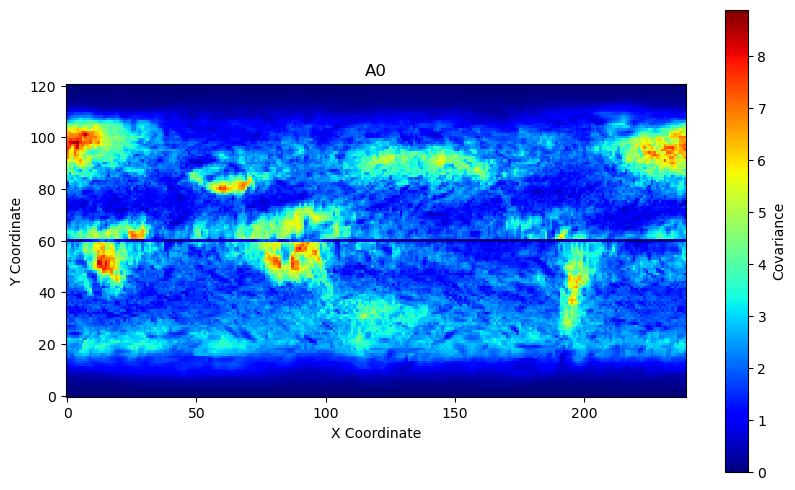

In [4]:
# load A_0 data

import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the saved .npy file
output_directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(output_directory, "dist_of_A0_winter.npy")

# Load the array
A0 = np.load(file_path)
print("Shape of A0:", A0.shape)

# Find the indices where A0 has nan values
nan_indices = np.where(np.isnan(A0))

print("Indices of nan values in A0:", nan_indices)

plt.figure(figsize=(10, 6))
plt.imshow(A0, cmap='jet', origin='lower', interpolation='nearest')  # Set cmap to 'jet' and origin to 'lower'
plt.colorbar(label='Covariance')
plt.title('A0')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()



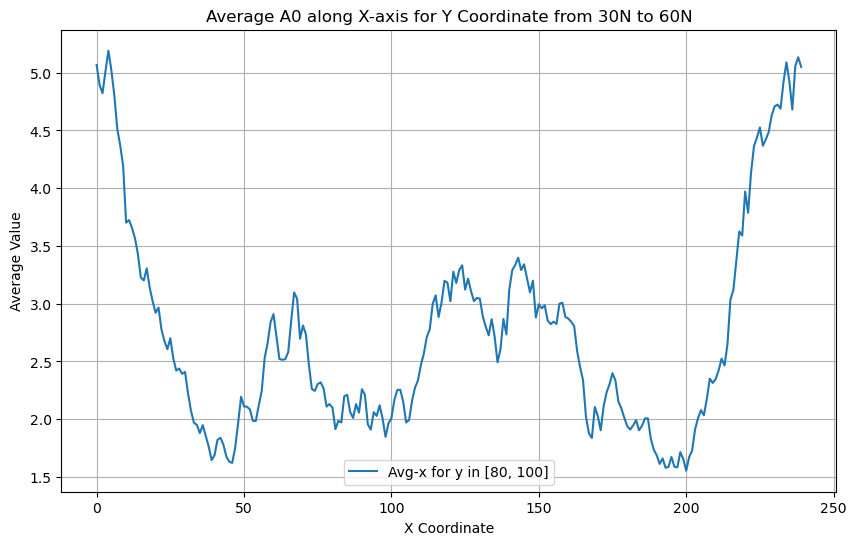

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

global zonal_avg_a0
# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = A0[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_a0 = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_a0, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average A0 along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
zonal_avg_alpha = None

(121, 240)


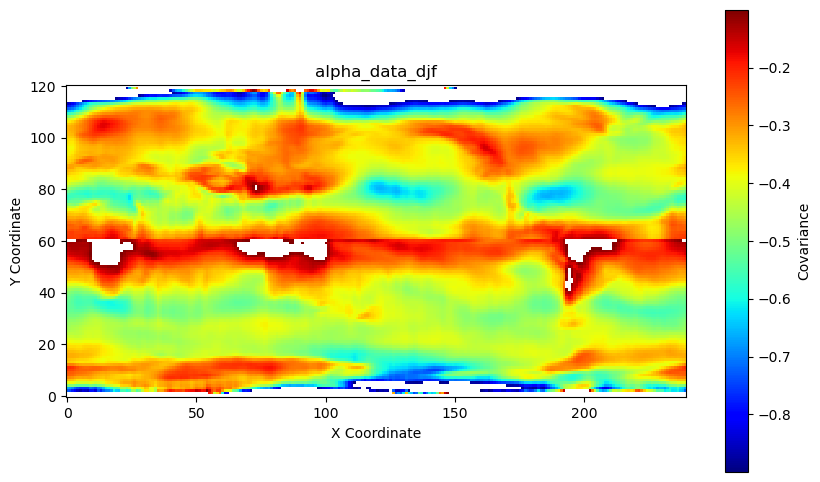

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
save_folder = "/scratch/negishi/yan481/KenYan_Traffic_Model/alpha_regression_DJF"
file_path = os.path.join(save_folder, 'slope_data_djf.npy')
alpha_data_djf = np.load(file_path, allow_pickle=True)
print(alpha_data_djf.shape)

alpha_data_djf[(alpha_data_djf < -0.9) | (alpha_data_djf > -0.1)] = np.nan
plt.figure(figsize=(10, 6))
plt.imshow(alpha_data_djf, cmap='jet', origin='lower', interpolation='nearest')  # Set cmap to 'jet' and origin to 'lower'
plt.colorbar(label='Covariance')
plt.title('alpha_data_djf')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()



(121, 240)


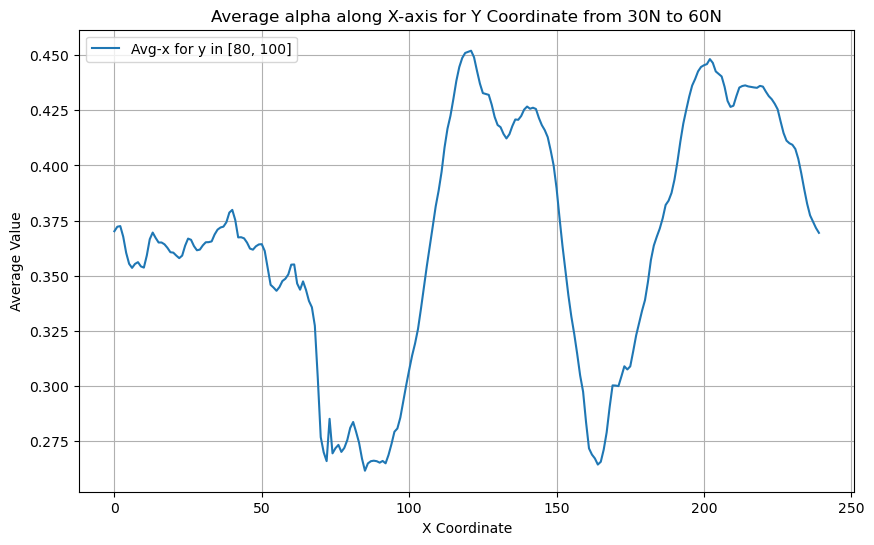

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt

save_folder = "/scratch/negishi/yan481/KenYan_Traffic_Model/alpha_regression_DJF"
file_path = os.path.join(save_folder, 'slope_data_djf.npy')
alpha_data_djf = np.load(file_path, allow_pickle=True)
print(alpha_data_djf.shape)
global zonal_avg_alpha

# Masking values outside the range [-0.9, -0.1]
alpha_data_djf[(alpha_data_djf < -0.9) | (alpha_data_djf > -0.1)] = np.nan

# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = alpha_data_djf[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_alpha = -np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_alpha, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Average alpha along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


(121, 240)


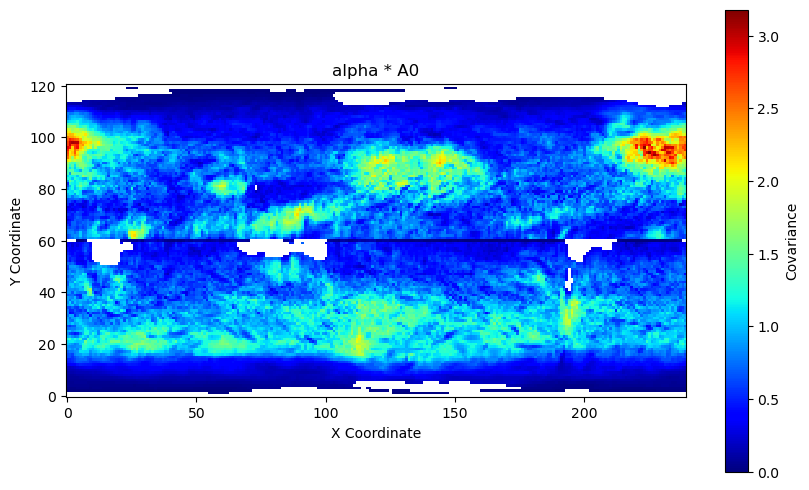

In [9]:
product = -alpha_data_djf * A0
print(product.shape)

plt.figure(figsize=(10, 6))
plt.imshow(product, cmap='jet', origin='lower', interpolation='nearest')  # Set cmap to 'jet' and origin to 'lower'
plt.colorbar(label='Covariance')
plt.title('alpha * A0')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


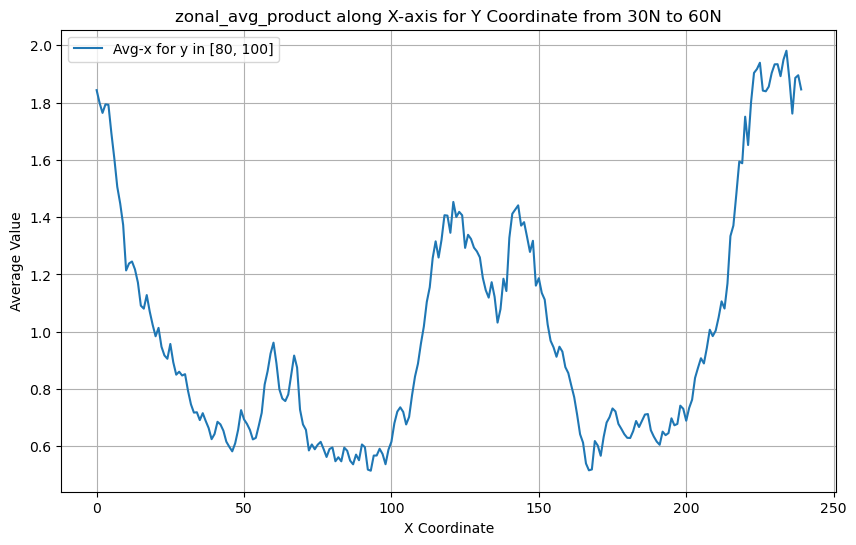

In [10]:
global zonal_avg_product


# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
y_range_data = product[80:101, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_product = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_product, label='Avg-x for y in [80, 100]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('zonal_avg_product along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


(121, 240)


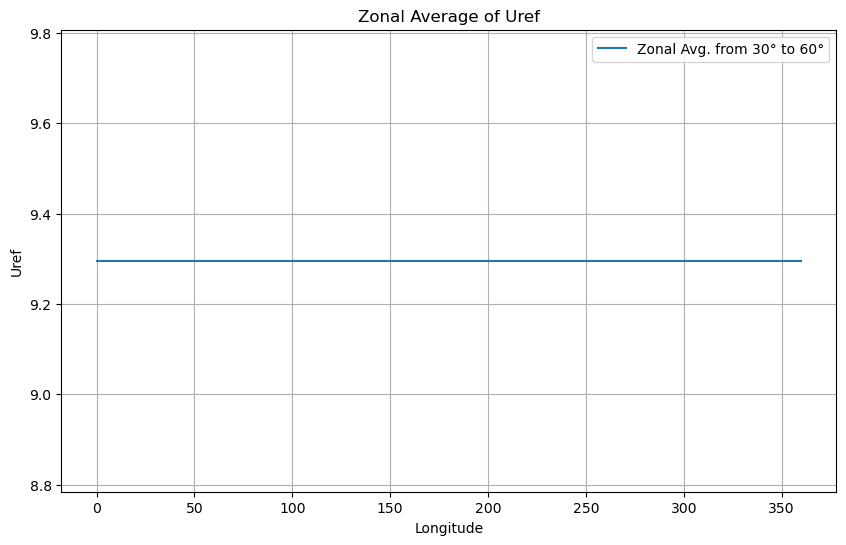

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# Set the path to the saved .npy file
directory = "/scratch/negishi/yan481/KenYan_Traffic_Model/hn2016-falwa_calculation"
file_path = os.path.join(directory, "time_averaged_column_Uref.npy")

# Load the array
time_averaged_Uref = np.load(file_path)

# Print shape or some initial values to confirm
print(time_averaged_Uref.shape)


def plot_zonal_avg_Uref(Lon, Uref, lat_range=(25, 65)):
    """
    Plot a zonal average of u0 for a specified latitudinal range.
    
    Parameters:
    - Lon: Longitudes array.
    - Uref: 2D array of Uref values.
    - lat_range: Tuple of (lat_start, lat_end) for which the zonal average should be calculated.
    
    Returns:
    - A matplotlib figure with the zonal average plot.
    """
    global zonal_avg_Uref
    
    # Calculate Lat array based on the new step and range
    Lat = np.linspace(90, -90, Uref.shape[0])
    
    # Determine indices corresponding to the given latitude range.
    lat_indices = np.where((Lat >= lat_range[0]) & (Lat <= lat_range[1]))[0]
    
    # Calculate the zonal average for the specified latitude range.
    zonal_avg_Uref = np.mean(Uref[lat_indices, :], axis=0)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(Lon, zonal_avg_Uref, label=f"Zonal Avg. from {lat_range[0]}° to {lat_range[1]}°")
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Uref')
    ax.set_title('Zonal Average of Uref')
    ax.grid(True)
    ax.legend()
    
    return fig

# Define lon and lat arrays based on new step and range
lon = np.linspace(0, 360, 240)
lat = np.linspace(90, -90, 121)

# Use the function
fig = plot_zonal_avg_Uref(lon, time_averaged_Uref, lat_range=(30, 60))
plt.show()


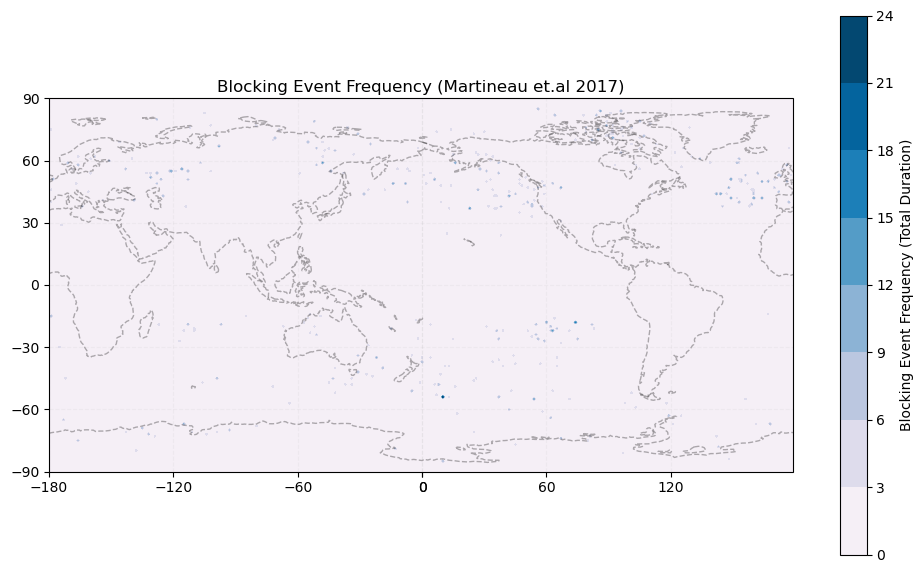

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import datetime



# Load blocking events
data1 = np.load('/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingEventDate4.0NH.npy', allow_pickle=True)
data2 = np.load('/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingEventDate4.0SH.npy', allow_pickle=True)

# Vertically stack the arrays
blocking_data = np.vstack((data1, data2))

# Filter rows based on the month and year condition
filtered = []
for event in blocking_data:
    event_date = event[0]
    if event_date.month in [1, 2, 12] and 1979 <= event_date.year <= 2016:
        filtered.append(event)

# Convert the filtered list back to a NumPy array
filtered_blocking_data = np.array(filtered)


# Create an empty frequency grid
frequency_grid = np.zeros((181, 360))

# Process each event
for event in filtered_blocking_data:
    event_date, duration_str, lon_str, lat_str = event
    duration = int(duration_str.split(":")[1].strip())  # Extract duration
    lon = int(lon_str.split(":")[1].strip())  # Extract longitude
    lat = int(lat_str.split(":")[1].strip())  # Extract latitude

    # Convert latitude and longitude to grid indices
    lat_idx = int(lat + 90)  # Shift latitude index to start from 0 at -90
    lon_idx = int(lon) if lon >= 0 else int(360 + lon)  # Adjust for negative longitudes

    # Accumulate the duration in the grid
    frequency_grid[lat_idx, lon_idx] += duration

# Plotting
fig = plt.figure(figsize=[12, 7])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
plt.contourf(np.arange(0, 360), np.arange(-90, 91), frequency_grid, transform=ccrs.PlateCarree(), cmap='PuBu')
ax.coastlines(linestyle="--", alpha=0.3)
ax.gridlines(linestyle="--", alpha=0.1)
ax.set_xticks(np.linspace(-180, 180, 7), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 7), crs=ccrs.PlateCarree())
plt.colorbar(label='Blocking Event Frequency (Total Duration)')
plt.title('Blocking Event Frequency (Martineau et.al 2017)', pad=5)
plt.show()

(181, 360)


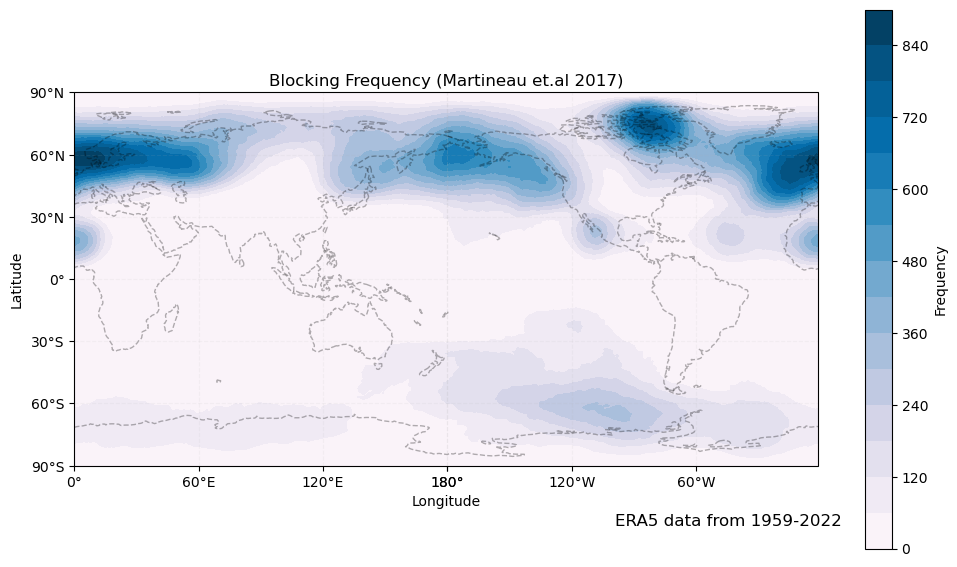

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 11 17:23:54 2023

@author: kaying
"""

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 

import numpy as np
NH = np.load("/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/Blockingfrequency4.0NH.npy")
SH = np.load("/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/Blockingfrequency4.0SH.npy")
BlockingFreq = NH+SH


Plot = BlockingFreq
Lat = np.load("/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lat.npy")
Lon = np.load("/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/ERA5_lon.npy")
Period = "from 1959-2022"
levs = 15
fig = plt.figure(figsize=[12,7])

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=180))

plt.contourf(Lon, Lat,Plot, levs,transform=ccrs.PlateCarree(),  cmap='PuBu')


ax.coastlines(linestyle="--", alpha=0.3)
ax.gridlines(linestyle="--", alpha=0.1)
ax.set_xticks([-180,-120,-60,0,60,120,180],crs=ccrs.PlateCarree())
ax.set_yticks([-90,-60,-30,0,30,60,90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(transform_precision = 1,zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cb=plt.colorbar()

cb.set_label('Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Blocking Frequency (Martineau et.al 2017)', pad=5)

plt.suptitle('ERA5 data '+str(Period), x=0.67,y=0.16)
print(BlockingFreq.shape)



In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 

import numpy as np

BlockingFreq = np.load("/depot/wanglei/etc/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingFrequency.npy")


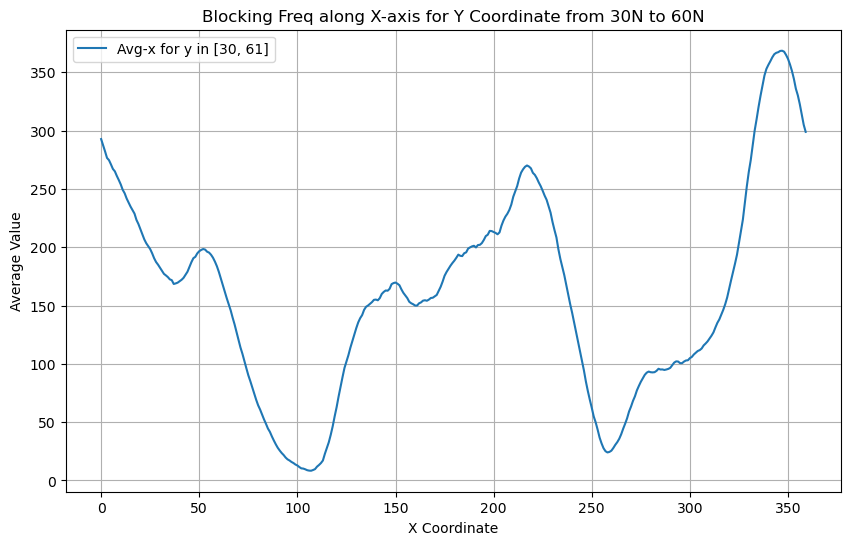

In [15]:
global zonal_avg_b


# Selecting y coordinate range from 80 to 100 steps - 30N to 60N
# y_range_data = BlockingFreq[120:151, :]
y_range_data = BlockingFreq[30:61, :]

# Calculate the average along the y-axis (axis=0)
zonal_avg_b = np.nanmean(y_range_data, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zonal_avg_b, label='Avg-x for y in [30, 61]')
plt.xlabel('X Coordinate')
plt.ylabel('Average Value')
plt.title('Blocking Freq along X-axis for Y Coordinate from 30N to 60N')
plt.legend()
plt.grid(True)
plt.show()


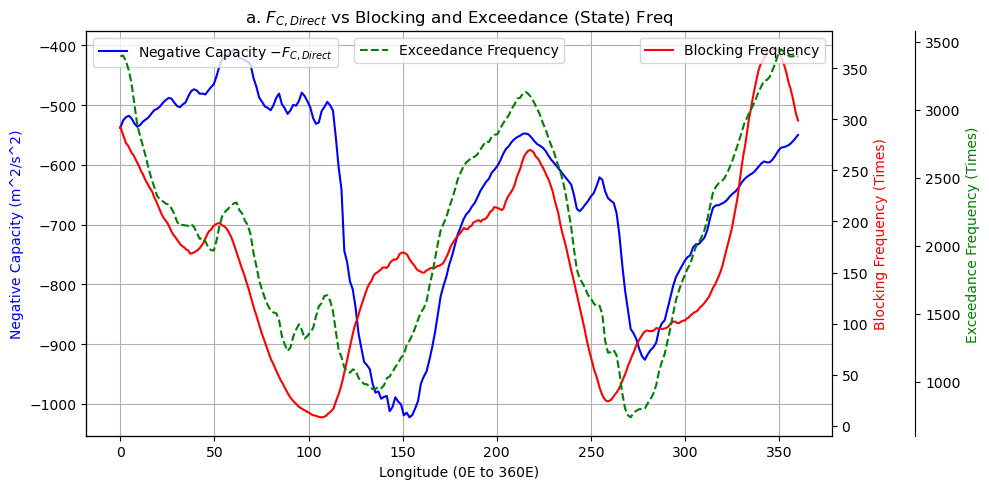

In [16]:
### half 0423
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the data file
file_path = os.path.join("/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis_ver0221/", "zonal_freq_filtered.npy")
exceedance_freq = np.load(file_path)

# Define the longitudes
longitudes = np.linspace(0, 360, 240)
longitudes2 = np.linspace(0, 360, 360)

# Create a figure
plt.figure(figsize=(10, 5))

# Create the subplot
ax3 = plt.subplot(1, 1, 1)  # 1 row, 1 column, 1st subplot
ax4 = ax3.twinx()
ax6 = ax3.twinx()

# Plot on the subplot
ax3.plot(longitudes, -zonal_avg_flux_cap, label=r'Negative Capacity $-F_{C, Direct}$', color='blue')
ax4.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')
ax6.plot(longitudes, exceedance_freq, label='Exceedance Frequency', color='green', linestyle='--')

ax3.set_xlabel('Longitude (0E to 360E)')
ax3.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax4.set_ylabel('Blocking Frequency (Times)', color='red')
ax3.set_title(r'a. $F_{C, Direct}$ vs Blocking and Exceedance (State) Freq')
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')
ax3.grid(True)

# Adjust the position of the rightmost y-axis
ax6.spines['right']. set_position(('outward', 60))
ax6.set_ylabel('Exceedance Frequency (Times)', color='green')
ax6.legend(loc='upper center')

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()


/home/yan481/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/yan481/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


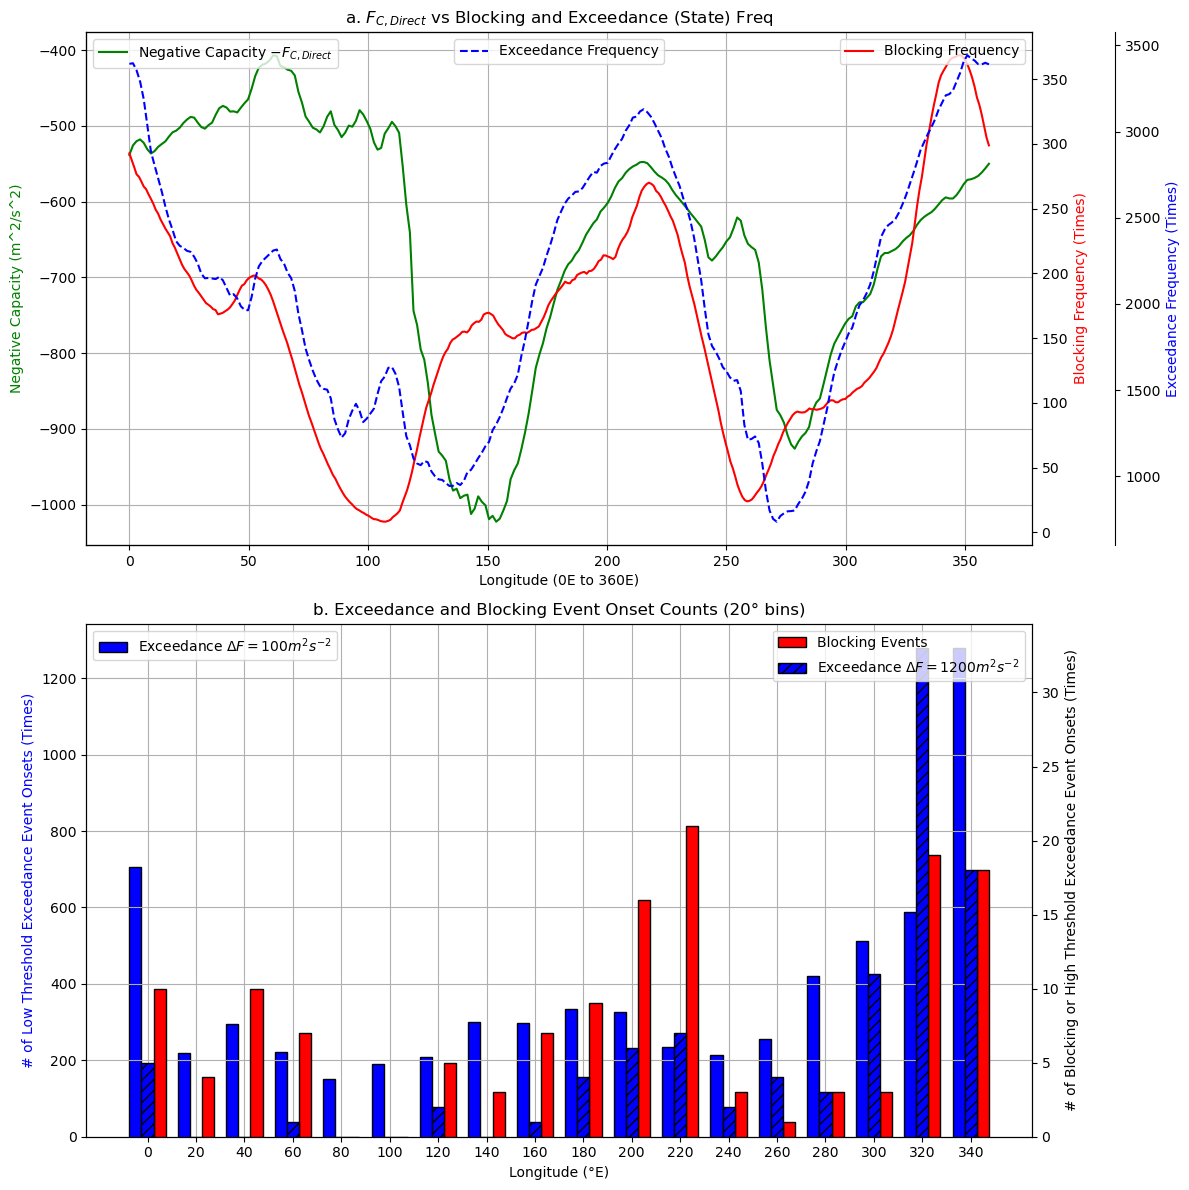

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from matplotlib.ticker import MaxNLocator


# Load the data file for the first plot
file_path = os.path.join("/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis_ver0221/", "zonal_freq_filtered.npy")
exceedance_freq = np.load(file_path)

# Define the longitudes
longitudes = np.linspace(0, 360, 240)
longitudes2 = np.linspace(0, 360, 360)

def plot_event_counts(data, latitude_range, longitude_range, bin_size, ax, width, position, color, hatch, label):
    # Add a longitude bin column before filtering
    data['Longitude_bin'] = (data['Longitude'] // bin_size * bin_size).astype(int)

    # Filter data based on Latitude, Longitude and EventType
    filtered_data = data[
        (data['Latitude'] >= latitude_range[0]) & (data['Latitude'] <= latitude_range[1]) &
        (data['Longitude'] >= longitude_range[0]) & (data['Longitude'] <= longitude_range[1]) &
        (data['EventType'] != 'Non-Match')
    ]
    
    event_counts = filtered_data.groupby('Longitude_bin').size().reindex(range(0, 360, bin_size), fill_value=0)

    # Adjust positions for bar placement
    offsets = np.arange(len(event_counts)) + position

    # Plot the bar chart
    ax.bar(offsets, event_counts, width=width, color=color, hatch=hatch, edgecolor='black', label=label, align='center')
    
    # Return the total number of events for this dataset
    return filtered_data.shape[0]

def plot_blocking_events(bin_size, ax, width, position, color, hatch, label):
    # Load blocking events data
    data1 = np.load('/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingEventDate4.0.npy', allow_pickle=True)
    data2 = np.load('/scratch/negishi/yan481/KenYan_Traffic_Model/Ka Ying Blocking Data/BlockingEventDate4.0SH.npy', allow_pickle=True)

    # Combine the data from both files
    combined_data = np.concatenate((data1, data2))

    # Create a DataFrame from the numpy array for easier manipulation
    columns = ['Date', 'Duration', 'Longitude', 'Latitude']
    df = pd.DataFrame(combined_data, columns=columns)

    # Extract numerical values for Longitude and Latitude
    df['Longitude'] = df['Longitude'].apply(lambda x: float(x.split(': ')[1]))
    df['Latitude'] = df['Latitude'].apply(lambda x: float(x.split(': ')[1]))

    # Convert 'Date' to datetime objects and extract relevant temporal and geographical information
    df['Date'] = pd.to_datetime(df['Date'])
    df['Longitude_bin'] = (df['Longitude'] // bin_size * bin_size).astype(int)

    df = df[(df['Latitude'] >= 30) & (df['Latitude'] <= 60) &
            (df['Longitude'] >= 0) & (df['Longitude'] <= 360) &
            (df['Date'].dt.month.isin([12, 1, 2])) &
            (df['Date'].dt.year >= 1979) & (df['Date'].dt.year <= 2016)]

    event_counts = df.groupby('Longitude_bin').size().reindex(range(0, 360, bin_size), fill_value=0)

    # Adjust positions for bar placement
    offsets = np.arange(len(event_counts)) + position

    # Plot the bar chart
    ax.bar(offsets, event_counts, width=width, color=color, hatch=hatch, edgecolor='black', label=label, align='center')
    
    # Return the total number of blocking events
    return df.shape[0]

# Create the figure and axes for a two-row subplot layout
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 12))

# First subplot (original a)
ax4 = ax1.twinx()
ax6 = ax1.twinx()
ax1.plot(longitudes, -zonal_avg_flux_cap, label=r'Negative Capacity $-F_{C, Direct}$', color='green')
ax4.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')
ax6.plot(longitudes, exceedance_freq, label='Exceedance Frequency', color='blue', linestyle='--')
ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Capacity (m^2/s^2)', color='green')
ax4.set_ylabel('Blocking Frequency (Times)', color='red')
ax1.set_title(r'a. $F_{C, Direct}$ vs Blocking and Exceedance (State) Freq')
ax6.spines['right'].set_position(('outward', 60))
ax6.set_ylabel('Exceedance Frequency (Times)', color='blue')
ax1.legend(loc='upper left')
ax4.legend(loc='upper right')
ax6.legend(loc='upper center')
ax1.grid(True)

# Second subplot
bar_width = 0.25  # Width of each bar
ax2 = ax3.twinx()
data_low = pd.read_csv('/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis_ver0221/filtered_results_with_hour_difference.csv')
total_low = plot_event_counts(data_low, latitude_range=(30, 60), longitude_range=(0, 360), bin_size=20, ax=ax3, width=bar_width, position=-bar_width, color='blue', hatch=None, label=r'Exceedance $\Delta F = 100 m^2s^{-2}$')
total_blocking = plot_blocking_events(20, ax=ax2, width=bar_width, position=bar_width, color='red', hatch=None, label='Blocking Events')
data_high = pd.read_csv('/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis_ver0221_high_threshold_1200/filtered_results_with_hour_difference.csv')
total_high = plot_event_counts(data_high, latitude_range=(30, 60), longitude_range=(0, 360), bin_size=20, ax=ax2, width=bar_width, position=0, color='blue', hatch='///', label=r'Exceedance $\Delta F = 1200 m^2s^{-2}$')


ax3.set_xlabel('Longitude (°E)')
ax3.set_ylabel(r'# of Low Threshold Exceedance Event Onsets (Times)', color = 'blue')
ax2.set_ylabel(r'# of Blocking or High Threshold Exceedance Event Onsets (Times)', color = 'black')
ax3.set_title(r'b. Exceedance and Blocking Event Onset Counts (20° bins)')
ax3.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.grid(True)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=7))
ax3.set_xticks(np.arange(len(np.unique(data_low['Longitude'] // 20 * 20))))
ax3.set_xticklabels([f'{x * 20}' for x in range(int((360 - 0) / 20))])

plt.tight_layout()
plt.show()

In [18]:
total_blocking, total_high

(139, 97)

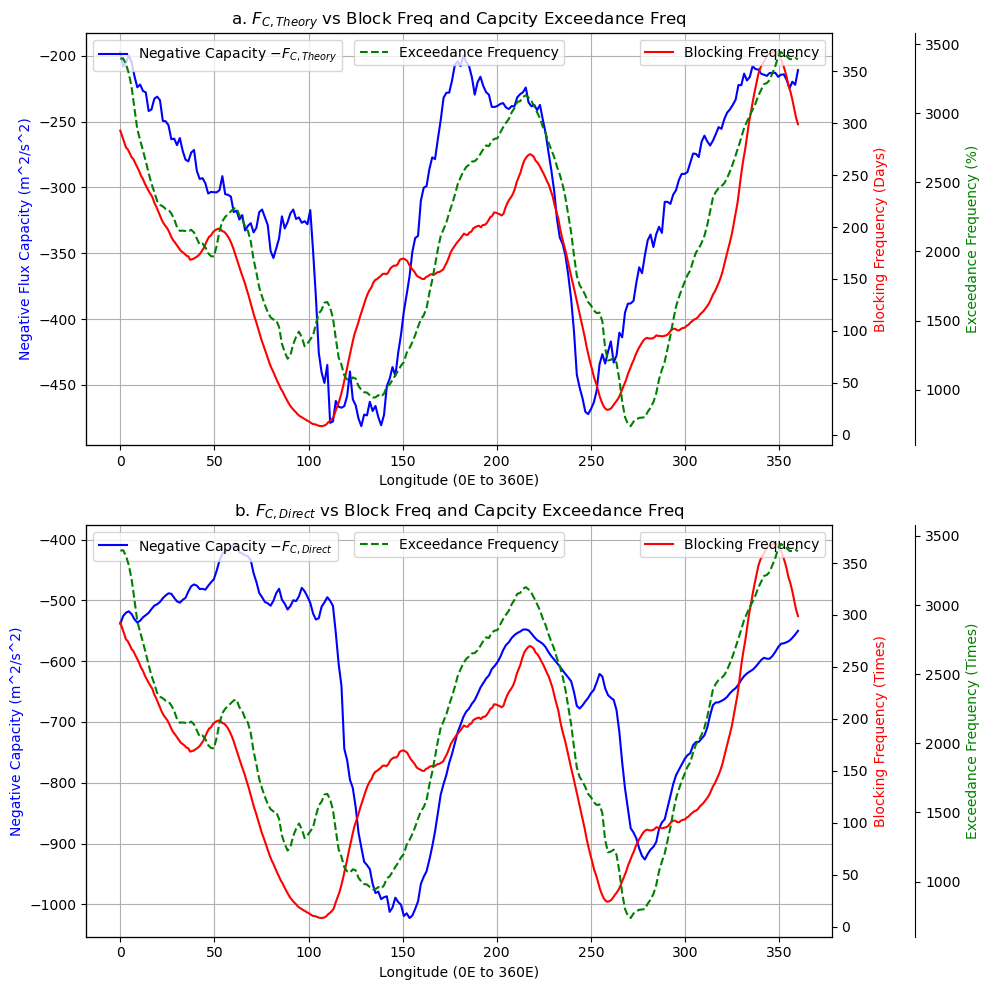

In [19]:

#### Correct 0124

import matplotlib.pyplot as plt
import numpy as np


file_path = os.path.join("/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis_ver0221/", "zonal_freq_filtered.npy")

# file_path = os.path.join("/scratch/negishi/yan481/KenYan_Traffic_Model/flux_difference_comparison_DJF_Reanalysis/", "zonal_freq.npy")
exceedance_freq = np.load(file_path)





# Define the longitudes
longitudes = np.linspace(0, 360, 240)
longitudes2 = np.linspace(0, 360, 360)

# Create a figure
plt.figure(figsize=(10, 10))

# Create the first subplot
ax1 = plt.subplot(2, 1, 1)  # 1 row, 2 columns, 1st subplot
ax2 = ax1.twinx()
ax5 = ax1.twinx()

# Plot on the first subplot
ax1.plot(longitudes, -(reduced_Cg_avg_1D + zonal_avg_Uref - 2 * zonal_avg_product) ** 2 / (4 * zonal_avg_alpha), label=r'Negative Capacity $-F_{C, Theory}$', color='blue')
ax2.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')
ax5.plot(longitudes, exceedance_freq, label='Exceedance Frequency', color='green', linestyle='--')

ax1.set_xlabel('Longitude (0E to 360E)')
ax1.set_ylabel('Negative Flux Capacity (m^2/s^2)', color='blue')
ax2.set_ylabel('Blocking Frequency (Days)', color='red')
ax1.set_title(r'a. $F_{C, Theory}$ vs Block Freq and Capcity Exceedance Freq')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Adjust the position of the rightmost y-axis
ax5.spines['right'].set_position(('outward', 60))
ax5.set_ylabel('Exceedance Frequency (%)', color='green')
ax5.legend(loc='upper center')

# Create the second subplot
ax3 = plt.subplot(2, 1, 2)  # 1 row, 2 columns, 2nd subplot
ax4 = ax3.twinx()
ax6 = ax3.twinx()

# Plot on the second subplot
ax3.plot(longitudes, -zonal_avg_flux_cap, label=r'Negative Capacity $-F_{C, Direct}$', color='blue')
ax4.plot(longitudes2, zonal_avg_b, label='Blocking Frequency', color='red')
ax6.plot(longitudes, exceedance_freq, label='Exceedance Frequency', color='green', linestyle='--')

ax3.set_xlabel('Longitude (0E to 360E)')
ax3.set_ylabel('Negative Capacity (m^2/s^2)', color='blue')
ax4.set_ylabel('Blocking Frequency (Times)', color='red')
ax3.set_title(r'b. $F_{C, Direct}$ vs Block Freq and Capcity Exceedance Freq')
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')
ax3.grid(True)

# Adjust the position of the rightmost y-axis
ax6.spines['right'].set_position(('outward', 60))
ax6.set_ylabel('Exceedance Frequency (Times)', color='green')
ax6.legend(loc='upper center')

# Show the plot with adjusted layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  # Increase the horizontal spacing between subplots
plt.show()
